### Context and Content

A company which is active in Big Data and Data Science wants to hire data scientists among people who has successfully passed some courses which were conducted by the company. Many people signup for its courses. The company wants to know what charateristic of the course-takers that will likely to apply to the company after joining the training.This could helps them to reduce the cost and time by dealing and promoting to only limited profile of data scientists, as well as improving quality of training or planning the courses. The HR Team also want to understand the factor that cause them seeking to leave their current company

source dataset : https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists





### Data dictionary

enrollee_id : Unique ID for candidate

city: City code

city_ development _index : Developement index of the city (scaled)

gender: Gender of candidate

relevent_experience: Relevant experience of candidate

enrolled_university: Type of University course enrolled if any

education_level: Education level of candidate

major_discipline :Education major discipline of candidate

experience: Candidate total experience in years

company_size: No of employees in current employer's company

company_type : Type of current employer

lastnewjob: Difference in years between previous job and current job

training_hours: training hours completed

target: 0 – Not looking for job change, 1 – Looking for a job change

Inspiration
Predict the probability of a candidate will work for the company
Interpret model(s) such a way that illustrate which features affect candidate decision

In [1]:
# Import the os module
import os

# Get the current working directory and set
os.chdir('D:\DIBIMBING')
cwd = os.getcwd()

# Print the current working directory
print("Current working directory: {0}".format(cwd))

# Print the type of the returned object
print("os.getcwd() returns an object of type: {0}".format(type(cwd)))



class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

Current working directory: D:\DIBIMBING
os.getcwd() returns an object of type: <class 'str'>


In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [3]:
train_data = pd.read_csv("aug_train.csv")

In [4]:
test_data = pd.read_csv("aug_test.csv")

In [5]:
sample_submission = pd.read_csv("sample_submission.csv")

In [6]:
pd.set_option('display.max_columns', None)

In [7]:
#Merge test data and train data to cleansing
print(train_data.info())
print(test_data.info())
test_data['target'] = 'No_data'
data = pd.concat([train_data,test_data])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [54]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 12445 entries, 1 to 2128
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   enrollee_id              12445 non-null  int64   
 1   city                     12445 non-null  object  
 2   city_development_index   12445 non-null  float64 
 3   gender                   9974 non-null   object  
 4   relevent_experience      12445 non-null  category
 5   enrolled_university      12445 non-null  category
 6   education_level          12445 non-null  category
 7   experience               12445 non-null  category
 8   company_size             12445 non-null  category
 9   last_new_job             12445 non-null  category
 10  training_hours           12445 non-null  int64   
 11  target                   12445 non-null  object  
 12  relevent_experience_new  12445 non-null  int8    
 13  enrolled_university_new  12445 non-null  int8    
 14  educati

In [55]:
data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,experience,company_size,last_new_job,training_hours,target,relevent_experience_new,enrolled_university_new,education_level_new,experience_new,company_size_new,last_new_job_new,encoded_Male,encoded_Other,encoded_Business Degree,encoded_Humanities,encoded_No Major,encoded_Other,encoded_STEM,encoded_Funded Startup,encoded_NGO,encoded_Other,encoded_Public Sector,encoded_Pvt Ltd
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,15,50-99,>4,47,0.0,0,0,0,15,2,5,1,0,0,0,0,0,1,0,0,0,0,1
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,>20,50-99,4,8,0.0,1,0,1,21,2,4,1,0,0,0,0,0,1,1,0,0,0,0
7,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,13,<10,>4,18,1.0,1,0,0,13,0,5,1,0,0,0,0,0,1,0,0,0,0,1
8,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,7,50-99,1,46,1.0,1,0,0,7,2,1,1,0,0,0,0,0,1,0,0,0,0,1
9,699,city_103,0.920,NaN,Has relevent experience,no_enrollment,Graduate,17,10000+,>4,123,0.0,1,0,0,17,7,5,0,1,0,0,0,0,1,0,0,0,0,1


In [9]:
#check the null
data.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    5016
relevent_experience          0
enrolled_university        417
education_level            512
major_discipline          3125
experience                  70
company_size              6560
company_type              6774
last_new_job               463
training_hours               0
target                       0
dtype: int64

In [10]:
#!pip install seaborn

<AxesSubplot:>

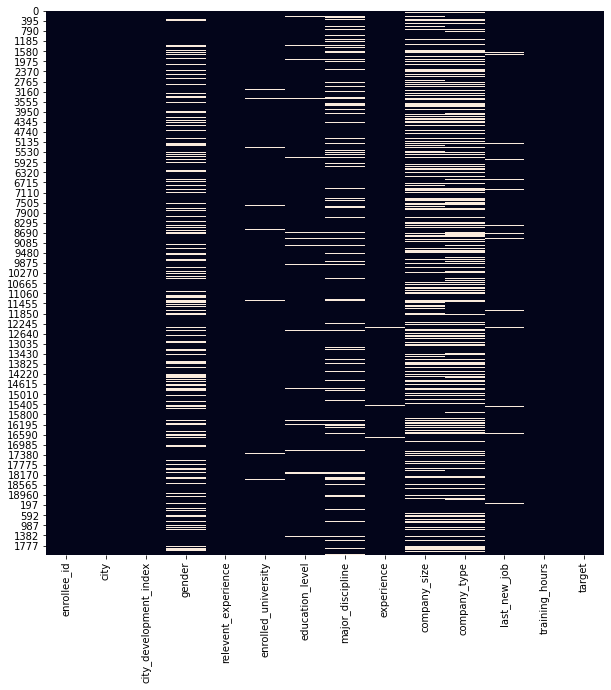

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.subplots(figsize=(10,10))
sns.heatmap(data.isnull(), cbar=False)

In [12]:
#check unique values to inspect columns
for i in data.columns:
    print(i,":",data[i].unique())


enrollee_id : [ 8949 29725 11561 ... 31762  7873 12215]
city : ['city_103' 'city_40' 'city_21' 'city_115' 'city_162' 'city_176'
 'city_160' 'city_46' 'city_61' 'city_114' 'city_13' 'city_159' 'city_102'
 'city_67' 'city_100' 'city_16' 'city_71' 'city_104' 'city_64' 'city_101'
 'city_83' 'city_105' 'city_73' 'city_75' 'city_41' 'city_11' 'city_93'
 'city_90' 'city_36' 'city_20' 'city_57' 'city_152' 'city_19' 'city_65'
 'city_74' 'city_173' 'city_136' 'city_98' 'city_97' 'city_50' 'city_138'
 'city_82' 'city_157' 'city_89' 'city_150' 'city_70' 'city_175' 'city_94'
 'city_28' 'city_59' 'city_165' 'city_145' 'city_142' 'city_26' 'city_12'
 'city_37' 'city_43' 'city_116' 'city_23' 'city_99' 'city_149' 'city_10'
 'city_45' 'city_80' 'city_128' 'city_158' 'city_123' 'city_7' 'city_72'
 'city_106' 'city_143' 'city_78' 'city_109' 'city_24' 'city_134' 'city_48'
 'city_144' 'city_91' 'city_146' 'city_133' 'city_126' 'city_118' 'city_9'
 'city_167' 'city_27' 'city_84' 'city_54' 'city_39' 'city_79'

In [13]:
#fill NAN for Gender column
data['gender_new'] = data['gender']
data['gender_new'] = data['gender_new'].fillna('Other')
print('remaining null:',data['gender_new'].isnull().sum())

remaining null: 0


In [14]:
# Drop Rows if Remaining columns is null ( gender is already imputeda)
print('before:')
print(data.isnull().sum())
column_with_null = ['enrolled_university','education_level','major_discipline','company_size','company_type','last_new_job','experience']
data = data.dropna(subset = column_with_null)
print('after:')
print(data.isnull().sum())
      

before:
enrollee_id                  0
city                         0
city_development_index       0
gender                    5016
relevent_experience          0
enrolled_university        417
education_level            512
major_discipline          3125
experience                  70
company_size              6560
company_type              6774
last_new_job               463
training_hours               0
target                       0
gender_new                   0
dtype: int64
after:
enrollee_id                  0
city                         0
city_development_index       0
gender                    2471
relevent_experience          0
enrolled_university          0
education_level              0
major_discipline             0
experience                   0
company_size                 0
company_type                 0
last_new_job                 0
training_hours               0
target                       0
gender_new                   0
dtype: int64


In [15]:
#change category

data['gender_new'] = data['gender_new'].astype('category')
data['relevent_experience'] = data['relevent_experience'].astype('category')
data['enrolled_university'] = data['enrolled_university'].astype('category')
data['education_level'] = data['education_level'].astype('category')
data['major_discipline'] = data['major_discipline'].astype('category')
data['experience'] = data['experience'].astype('category')
data['company_size'] = data['company_size'].astype('category')
data['company_type'] = data['company_type'].astype('category')
data['last_new_job'] = data['last_new_job'].astype('category')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12445 entries, 1 to 2128
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   enrollee_id             12445 non-null  int64   
 1   city                    12445 non-null  object  
 2   city_development_index  12445 non-null  float64 
 3   gender                  9974 non-null   object  
 4   relevent_experience     12445 non-null  category
 5   enrolled_university     12445 non-null  category
 6   education_level         12445 non-null  category
 7   major_discipline        12445 non-null  category
 8   experience              12445 non-null  category
 9   company_size            12445 non-null  category
 10  company_type            12445 non-null  category
 11  last_new_job            12445 non-null  category
 12  training_hours          12445 non-null  int64   
 13  target                  12445 non-null  object  
 14  gender_new             

In [56]:
#Reorder category for ordinal category
data['relevent_experience'] = data['relevent_experience'].cat.reorder_categories(['No relevent experience','Has relevent experience' ])
data['enrolled_university'] = data['enrolled_university'].cat.reorder_categories(['no_enrollment', 'Part time course','Full time course'  ])
data['education_level'] = data['education_level'].cat.reorder_categories(['Graduate', 'Masters', 'Phd' ])
data['experience'] = data['experience'].cat.reorder_categories([ '<1','1','2' ,'3' ,'4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','>20' ])
data['company_size'] = data['company_size'].cat.reorder_categories(['<10','10/49','50-99' ,'100-500' ,'500-999','1000-4999','5000-9999','10000+'])
data['last_new_job'] = data['last_new_job'].cat.reorder_categories(['never' ,'1','2', '3',  '4','>4'])
#convert ordinal category into numbers
data['relevent_experience_new'] = data['relevent_experience'].cat.codes
data['enrolled_university_new'] = data['enrolled_university'].cat.codes
data['education_level_new'] = data['education_level'].cat.codes
data['experience_new'] = data['experience'].cat.codes
data['company_size_new'] = data['company_size'].cat.codes
data['last_new_job_new'] = data['last_new_job'].cat.codes
#check result
ordinal_to_numeric_column = ['relevent_experience','relevent_experience_new', 'enrolled_university','enrolled_university_new', 'education_level',
       'education_level_new', 'experience','experience_new', 'company_size','company_size_new', 
       'last_new_job', 'last_new_job_new']



In [57]:
data[ordinal_to_numeric_column].head()

,relevent_experience,relevent_experience_new,enrolled_university,enrolled_university_new,education_level,education_level_new,experience,experience_new,company_size,company_size_new,last_new_job,last_new_job_new
1,No relevent experience,0,no_enrollment,0,Graduate,0,15,15,50-99,2,>4,5
4,Has relevent experience,1,no_enrollment,0,Masters,1,>20,21,50-99,2,4,4
7,Has relevent experience,1,no_enrollment,0,Graduate,0,13,13,<10,0,>4,5
8,Has relevent experience,1,no_enrollment,0,Graduate,0,7,7,50-99,2,1,1
9,Has relevent experience,1,no_enrollment,0,Graduate,0,17,17,10000+,7,>4,5


In [18]:
#convert nominal columns to dummies
nominal_category = ['gender_new','major_discipline','company_type']
data = pd.get_dummies(data,prefix ='encoded', columns = nominal_category,drop_first = True)
#data = data.join(nominal_new)
#print(data.info())
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12445 entries, 1 to 2128
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   enrollee_id              12445 non-null  int64   
 1   city                     12445 non-null  object  
 2   city_development_index   12445 non-null  float64 
 3   gender                   9974 non-null   object  
 4   relevent_experience      12445 non-null  category
 5   enrolled_university      12445 non-null  category
 6   education_level          12445 non-null  category
 7   experience               12445 non-null  category
 8   company_size             12445 non-null  category
 9   last_new_job             12445 non-null  category
 10  training_hours           12445 non-null  int64   
 11  target                   12445 non-null  object  
 12  relevent_experience_new  12445 non-null  int8    
 13  enrolled_university_new  12445 non-null  int8    
 14  educati

## EDA

In [19]:
#only use train data for EDA
filter_test = data['target'] != 'No_data'
data_model = data[filter_test].copy()
data_model['target']=  data_model['target'].astype('float')
print(data_model.shape)

(11179, 30)


In [20]:
data_model.target.unique()

array([0., 1.])

<AxesSubplot:>

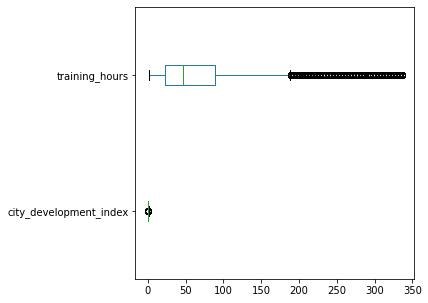

In [21]:
numerical = ['city_development_index','training_hours']
data_model[numerical].boxplot(
    column=numerical,
    fontsize=10,
    rot=0,
    grid=False,
    figsize=(5,5),
    vert=False
    )

There are many outlier in training_hours

In [22]:
Q1 = data_model[numerical].quantile(0.25)
Q3 = data_model[numerical].quantile(0.75)
IQR = Q3 - Q1
boxplot_min = Q1 - 1.5 * IQR
boxplot_max = Q3 + 1.5 * IQR
print('Q1:\n',Q1)
print('\nQ3:\n',Q3)
print('\nIQR:\n',IQR)
print('\nMin:\n',boxplot_min)
print('\nMax:\n',boxplot_max)

Q1:
 city_development_index     0.754
training_hours            23.000
Name: 0.25, dtype: float64

Q3:
 city_development_index     0.92
training_hours            89.00
Name: 0.75, dtype: float64

IQR:
 city_development_index     0.166
training_hours            66.000
dtype: float64

Min:
 city_development_index     0.505
training_hours           -76.000
dtype: float64

Max:
 city_development_index      1.169
training_hours            188.000
dtype: float64


In [23]:
non_outlier_df = data_model.copy()
for x in numerical:
  filter_min = non_outlier_df[x]<boxplot_min[x]
  filter_max = non_outlier_df[x]>boxplot_max[x]
  non_outlier_df = non_outlier_df[~(
    filter_min|filter_max
    )]

In [24]:
non_outlier_df.shape

(10588, 30)

there are 600-ish outlier that have been removed

array([[<AxesSubplot:title={'center':'city_development_index'}>,
        <AxesSubplot:title={'center':'training_hours'}>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

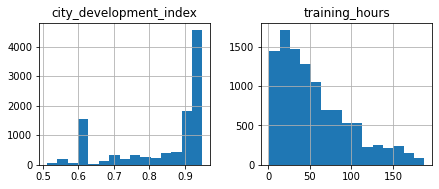

In [25]:
#distribution of numerical variable

non_outlier_df[numerical].hist(bins=15, figsize=(15, 6), layout=(2, 4))

most of candidates has under 100  training hours, and generally coming from cities with high development index

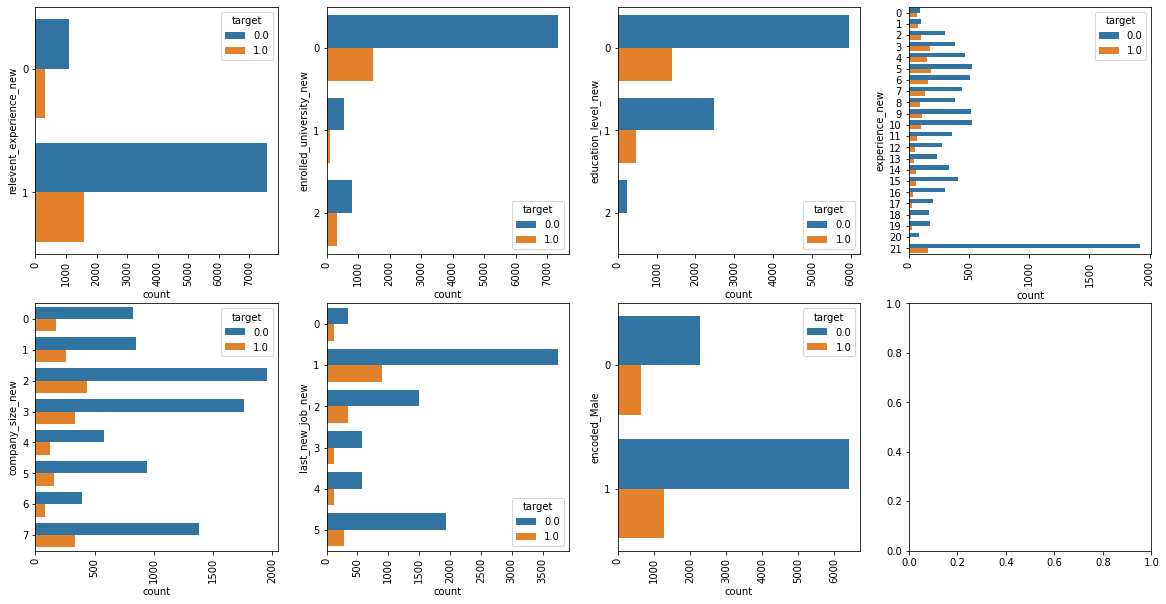

In [27]:
#Visualize counting bar for categorical variables
categorical = ['relevent_experience_new', 'enrolled_university_new',
       'education_level_new', 'experience_new', 'company_size_new',
       'last_new_job_new', 'encoded_Male']
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for variable, subplot in zip(categorical, ax.flatten()):
    #sns.countplot(data_model[variable], ax=subplot)
    sns.countplot(y = variable, hue ='target', data = non_outlier_df,ax = subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

In [28]:
#inspect the mean for each categorical variables
for i in categorical:
    print(non_outlier_df.groupby(i)['target'].mean())

relevent_experience_new
0    0.215092
1    0.174264
Name: target, dtype: float64
enrolled_university_new
0    0.167386
1    0.167183
2    0.281961
Name: target, dtype: float64
education_level_new
0    0.188931
1    0.161889
2    0.128920
Name: target, dtype: float64
experience_new
0     0.427711
1     0.438889
2     0.255639
3     0.318426
4     0.247154
5     0.258790
6     0.236802
7     0.233564
8     0.198312
9     0.179650
10    0.164800
11    0.152381
12    0.145062
13    0.147059
14    0.146154
15    0.126882
16    0.104167
17    0.130435
18    0.090909
19    0.113402
20    0.074468
21    0.075590
Name: target, dtype: float64
company_size_new
0    0.173695
1    0.235189
2    0.182237
3    0.160229
4    0.177715
5    0.143898
6    0.170168
7    0.194039
Name: target, dtype: float64
last_new_job_new
0    0.256303
1    0.194319
2    0.190811
3    0.173661
4    0.178723
5    0.125732
Name: target, dtype: float64
encoded_Male
0    0.217049
1    0.165515
Name: target, dtype: float64


1.most candidates have relevant experience,and those with no relevant experience tend to apply more
2.most candidates are currently not enrolling in any university, and those with full time enrollment tend to apply more
3.most candidates are having graduates degree,and graduates degree people tend to apply more
4.candidates are dominated by people who  have > 20 years of experiences, and those with less experiences tend to apply more
5.company size seems doesnt affect interest in applying
6. those with no previous job tend to apply more
7. female slighly apply more than male


In [29]:
#inspect the mean for each numerical variables
for i in numerical:
    print(non_outlier_df.groupby('target')[i].mean())

target
0.0    0.860593
1.0    0.723772
Name: city_development_index, dtype: float64
target
0.0    56.140933
1.0    53.868103
Name: training_hours, dtype: float64


1. Those who come from less developed city tend to apply more
2. those with less training hour tend to apply more

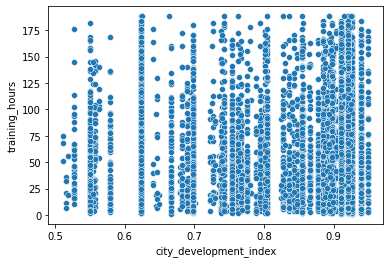

In [30]:
#visualize 2 numerical variable to inspect correlation
sns.scatterplot(x=non_outlier_df['city_development_index'], y=non_outlier_df['training_hours']);


Looks like there is no direct correlation between training hours and city development index

<AxesSubplot:xlabel='target', ylabel='training_hours'>

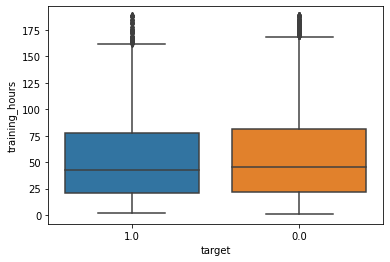

In [31]:
#visualize distribution of numerical variables
sorted_training_hours = non_outlier_df.groupby(['target'])['training_hours'].median().sort_values()
sns.boxplot(x=non_outlier_df['target'], y=non_outlier_df['training_hours'], order=list(sorted_training_hours.index))

No clear differents on training hours between those who apply and those that do not apply (visually, yet by using average it seems those with longer training hours tend to apply more)

<AxesSubplot:xlabel='target', ylabel='city_development_index'>

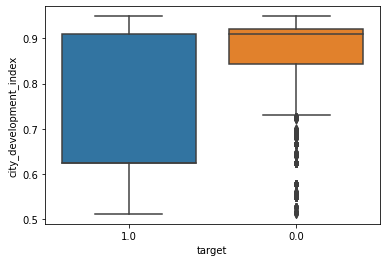

In [32]:
sorted_training_hours = non_outlier_df.groupby(['target'])['city_development_index'].median().sort_values()
sns.boxplot(x=non_outlier_df['target'], y=non_outlier_df['city_development_index'], order=list(sorted_training_hours.index))

Those from less developed city tend to apply more (in line with average comparison)

## Modelling

In [33]:
!pip install sklearn

In [34]:
#train test split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import scale
important_column_feature =['city_development_index',  'training_hours',
       'relevent_experience_new', 'enrolled_university_new',
       'education_level_new', 'experience_new', 'company_size_new',
       'last_new_job_new', 'encoded_Male', 'encoded_Other',
       'encoded_Business Degree', 'encoded_Humanities', 'encoded_No Major',
       'encoded_Other', 'encoded_STEM', 'encoded_Funded Startup',
       'encoded_NGO', 'encoded_Other', 'encoded_Public Sector',
       'encoded_Pvt Ltd']
important_column_target = ['target_new']
non_outlier_df['target_new'] = non_outlier_df['target'].astype('int')
x = non_outlier_df[important_column_feature].copy()
y = non_outlier_df[important_column_target].copy()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,stratify = y, random_state=4)



In [35]:
print(x.info())
print(y.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10588 entries, 1 to 19155
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   city_development_index   10588 non-null  float64
 1   training_hours           10588 non-null  int64  
 2   relevent_experience_new  10588 non-null  int8   
 3   enrolled_university_new  10588 non-null  int8   
 4   education_level_new      10588 non-null  int8   
 5   experience_new           10588 non-null  int8   
 6   company_size_new         10588 non-null  int8   
 7   last_new_job_new         10588 non-null  int8   
 8   encoded_Male             10588 non-null  uint8  
 9   encoded_Other            10588 non-null  uint8  
 10  encoded_Other            10588 non-null  uint8  
 11  encoded_Other            10588 non-null  uint8  
 12  encoded_Business Degree  10588 non-null  uint8  
 13  encoded_Humanities       10588 non-null  uint8  
 14  encoded_No Major      

In [36]:
print(y_train.shape)
print(x_train.shape)

(8470, 1)
(8470, 26)


In [39]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [40]:
#finding best parameers through randomizedsearchCV
from sklearn.ensemble import RandomForestRegressor
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 15, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


C:\Users\Asus A442U\.conda\envs\R_environment\lib\site-packages\sklearn\model_selection\_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=15,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [44]:
#generate best parameters
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

In [58]:
#apply best parameters to random forest classifier
from numpy import mean
from numpy import std
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 200,
 min_samples_split = 5,
 min_samples_leaf = 2,
 max_features = 'sqrt',
 max_depth =  10,
 bootstrap= True)


In [62]:
#Checking performance our model with classification report.
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
#Checking performance our model with ROC Score.
print('AUC:',roc_auc_score(y_test, y_pred))

C:\Users\Asus A442U\.conda\envs\R_environment\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1737
           1       0.60      0.49      0.54       381

    accuracy                           0.85      2118
   macro avg       0.75      0.71      0.72      2118
weighted avg       0.84      0.85      0.84      2118

AUC: 0.7079519852764518


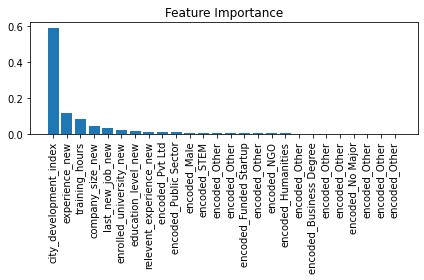

In [64]:
#visualize feature importances
import matplotlib.pyplot as plt
importances = model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]
plt.title('Feature Importance')
plt.bar(range(x_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(x_train.shape[1]), x_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

In [65]:
relative_importances=  pd.DataFrame(index = list(x_train),data = importances,columns = ['importance'] )
relative_importances.sort_values(by = 'importance',ascending = False)

,importance
city_development_index,0.591910
experience_new,0.114525
training_hours,0.084801
company_size_new,0.044966
last_new_job_new,0.033085
enrolled_university_new,0.022387
education_level_new,0.016331
relevent_experience_new,0.012134
encoded_Pvt Ltd,0.009537
encoded_Public Sector,0.009041


City development index is the most important factor affecting people to apply (59%), followed by experience and training hours

In [66]:
y_pred_prob = model.predict_proba(x_test)
print(y_pred_prob)

[[0.46423558 0.53576442]
 [0.9390493  0.0609507 ]
 [0.87258533 0.12741467]
 ...
 [0.91843374 0.08156626]
 [0.53183421 0.46816579]
 [0.75496595 0.24503405]]


In [68]:
data_decile_test = x_test.copy()
data_decile_test['prediction'] = y_pred_prob[:,1]
data_decile_test['real_tag'] = y_test.copy()
data_decile_test.sort_values(by = ['prediction'],ascending = False, inplace = True)
data_decile_test.reset_index(inplace = True)
del data_decile_test['index']
data_decile_test.reset_index(inplace = True)
data_decile_test['decile'] = pd.cut(data_decile_test['index'], 10, labels = False, duplicates ="drop")+1
data_decile_test.head()

,index,city_development_index,training_hours,relevent_experience_new,enrolled_university_new,education_level_new,experience_new,company_size_new,last_new_job_new,encoded_Male,encoded_Other,encoded_Other,encoded_Other,encoded_Business Degree,encoded_Humanities,encoded_No Major,encoded_Other,encoded_Other,encoded_Other,encoded_STEM,encoded_Funded Startup,encoded_NGO,encoded_Other,encoded_Other,encoded_Other,encoded_Public Sector,encoded_Pvt Ltd,prediction,real_tag,decile
0,0,0.624,24,1,2,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0.726248,0,1
1,1,0.558,64,1,2,0,1,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0.701930,1,1
2,2,0.624,124,1,2,0,1,2,0,0,1,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,0,0.700761,1,1
3,3,0.624,31,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0.690704,1,1
4,4,0.624,36,1,0,0,6,0,2,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0.685749,1,1


In [69]:
del data_decile_test['index']

In [70]:
summary = data_decile_test.groupby('decile').mean().copy()
summary

,city_development_index,training_hours,relevent_experience_new,enrolled_university_new,education_level_new,experience_new,company_size_new,last_new_job_new,encoded_Male,encoded_Other,encoded_Other,encoded_Other,encoded_Business Degree,encoded_Humanities,encoded_No Major,encoded_Other,encoded_Other,encoded_Other,encoded_STEM,encoded_Funded Startup,encoded_NGO,encoded_Other,encoded_Other,encoded_Other,encoded_Public Sector,encoded_Pvt Ltd,prediction,real_tag
decile,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.609788,43.740566,0.844340,0.382075,0.202830,5.165094,2.528302,1.504717,0.726415,0.235849,0.004717,0.004717,0.000000,0.000000,0.009434,0.235849,0.004717,0.004717,0.985849,0.061321,0.033019,0.235849,0.004717,0.004717,0.014151,0.787736,0.588195,0.613208
2,0.637170,67.537736,0.825472,0.556604,0.311321,6.905660,3.731132,1.905660,0.528302,0.410377,0.023585,0.023585,0.018868,0.023585,0.009434,0.410377,0.023585,0.023585,0.924528,0.051887,0.018868,0.410377,0.023585,0.023585,0.080189,0.773585,0.462379,0.533019
3,0.849250,57.877358,0.674528,0.882075,0.353774,8.127358,3.466981,2.165094,0.537736,0.377358,0.023585,0.018868,0.028302,0.103774,0.009434,0.377358,0.023585,0.018868,0.816038,0.023585,0.061321,0.377358,0.023585,0.018868,0.254717,0.575472,0.166460,0.122642
4,0.864502,52.706161,0.791469,0.393365,0.317536,9.109005,3.862559,2.402844,0.616114,0.289100,0.014218,0.000000,0.037915,0.071090,0.023697,0.289100,0.014218,0.000000,0.834123,0.056872,0.052133,0.289100,0.014218,0.000000,0.099526,0.763033,0.125560,0.146919
5,0.872967,50.613208,0.825472,0.221698,0.334906,9.933962,3.688679,2.603774,0.693396,0.179245,0.000000,0.000000,0.018868,0.028302,0.018868,0.179245,0.000000,0.000000,0.924528,0.051887,0.051887,0.179245,0.000000,0.000000,0.089623,0.768868,0.108954,0.103774
6,0.887123,50.033019,0.929245,0.141509,0.306604,11.872642,3.443396,2.688679,0.754717,0.150943,0.004717,0.014151,0.042453,0.033019,0.000000,0.150943,0.004717,0.014151,0.896226,0.066038,0.051887,0.150943,0.004717,0.014151,0.056604,0.778302,0.098621,0.070755
7,0.898773,53.151659,0.947867,0.104265,0.322275,12.355450,3.464455,2.327014,0.729858,0.165877,0.018957,0.000000,0.023697,0.033175,0.000000,0.165877,0.018957,0.000000,0.914692,0.080569,0.018957,0.165877,0.018957,0.000000,0.037915,0.848341,0.090327,0.066351
8,0.897995,53.688679,0.905660,0.061321,0.287736,14.457547,3.466981,2.320755,0.844340,0.094340,0.023585,0.004717,0.014151,0.023585,0.014151,0.094340,0.023585,0.004717,0.915094,0.113208,0.061321,0.094340,0.023585,0.004717,0.023585,0.773585,0.082770,0.051887
9,0.903321,53.712264,0.957547,0.023585,0.396226,17.566038,3.066038,2.575472,0.919811,0.061321,0.004717,0.000000,0.023585,0.056604,0.014151,0.061321,0.004717,0.000000,0.896226,0.080189,0.061321,0.061321,0.004717,0.000000,0.014151,0.830189,0.075120,0.023585


Summary from the Model :
Those course takers that are likely to apply :
1. coming from less developed cities
2. have less training hours
3. have less relevant experiences
4. generally have lower education level
5. have lowest experiences
6. If having experiences, coming from smaller companies
7. more likely STEM graduates compared to others
